<a href="https://colab.research.google.com/github/dlyrikz/DeepLearning/blob/CNN/CNN_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [3]:
# Install Tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


# Step 2: Data Preprocessing

In [5]:
# Import datasets
from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the dataset
(x_train, y_train),(x_test, y_test) = cifar10.load_data()


In [ ]:
# Assign classes to array
class_names = ['0: Airplane','1: Automobile', '2: Bird','3: Cat', '4: Deer','5: Dog', '6: Frog', '7: Horse', '8: Ship','9: Truck']
print(class_names)

In [15]:
# Get the Range of the datasets

x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [19]:
y_train.max(), y_train.min()

(9, 0)

In [17]:
# Normalize the images  -- Tip before training Machine Model NN learns faster
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
# Recheck after normalization should be 0-1

x_train.max(), x_train.min(), x_train.mean()


(1.0, 0.0, 0.4733630004850874)

In [20]:
# Check the shape
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

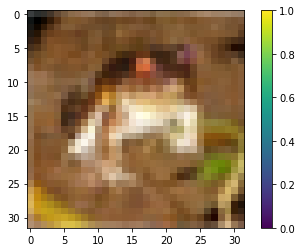

In [22]:
# Check single image
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [30]:
# Verify the image
y_train[0]

array([6], dtype=uint8)

In [29]:
class_names[6]

'6: Frog'

# Step 3: Building ther CNN Model

In [48]:
# Define an object
model = tf.keras.models.Sequential()  # sequence of Layers

In [49]:
# Adding 1st CNN layer
# 1) filters (kernel) = 32
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[32,32,3]))

In [50]:
# Adding 2nd CNN layer
# 1) filters (kernel) = 32
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))

# Specify Max Pool Layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))



In [51]:
# Adding 3rd CNN layer
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))


In [52]:
# Adding 4th CNN layer
# 1) filters (kernel) = 64
# 2) kernel size = 3 
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))

# Specify Max Pool Layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


In [53]:
# Adding the Dropout Layer
model.add(tf.keras.layers.Dropout(0.4))

In [54]:
# Adding the Flatten Layer  ** Converted array to vectors
model.add(tf.keras.layers.Flatten())

In [55]:
# Add the 1st Dense Layer (Fully Connected Layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [56]:
# Add the 2nd Dense Layer (Output Layer)
# 1) units = 10       *** 10 class_names outputs
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)         

# Step 4: Training the Model

In [58]:
# Compiling the model
# 1) Optimizer - adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy (acts as guide to optimizer)
# 3) matrices = sparse_categorical_accuracy  ***Tip for Binary use categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [59]:
# Training the Model

# epochs means the number of times to train the model

model.fit(x_train, y_train, batch_size=10, epochs=10)     

Epoch 1/10
5000/5000 [==============================] - 304s 61ms/step - loss: 1.4354 - sparse_categorical_accuracy: 0.4774
Epoch 2/10
5000/5000 [==============================] - 305s 61ms/step - loss: 1.0209 - sparse_categorical_accuracy: 0.6354
Epoch 3/10
5000/5000 [==============================] - 319s 64ms/step - loss: 0.8784 - sparse_categorical_accuracy: 0.6896
Epoch 4/10
5000/5000 [==============================] - 317s 63ms/step - loss: 0.7920 - sparse_categorical_accuracy: 0.7195
Epoch 5/10
5000/5000 [==============================] - 313s 63ms/step - loss: 0.7270 - sparse_categorical_accuracy: 0.7437
Epoch 6/10
5000/5000 [==============================] - 301s 60ms/step - loss: 0.6804 - sparse_categorical_accuracy: 0.7605
Epoch 7/10
5000/5000 [==============================] - 301s 60ms/step - loss: 0.6336 - sparse_categorical_accuracy: 0.7778
Epoch 8/10
5000/5000 [==============================] - 301s 60ms/step - loss: 0.5950 - sparse_categorical_accuracy: 0.7906
Epoch 9/

# Step 5: Model Evaluation and Prediction

In [60]:
# model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 42ms/step - loss: 0.7615 - sparse_categorical_accuracy: 0.7485


In [61]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.7484999895095825


In [63]:
# Model Prediction
y_predict = model.predict_classes(x_test)

y_predict[11], y_test[11]  # predicted output, actual output

(9, array([9], dtype=uint8))

In [64]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[798   8  51  18  24   3   4   7  48  39]
 [ 12 846   8   9   6   2  11   2  17  87]
 [ 73   1 654  55  72  37  67  26  10   5]
 [ 23   7  84 532  67 148  84  33  12  10]
 [ 14   3  89  44 722  16  60  41   8   3]
 [ 11   0  62 161  59 605  31  60   4   7]
 [  7   4  56  30  22   8 863   3   6   1]
 [ 19   2  41  28  74  39  11 780   1   5]
 [ 71  20  17  14   6   5   6   1 839  21]
 [ 26  48   7  17   5   3   7  11  30 846]]


In [65]:
acc_cm = accuracy_score(y_test, y_predict)
print(acc_cm)

0.7485
